In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats 
import random

In [2]:
df = pd.read_csv("/Users/matteo/Desktop/Bachelor /Projet Entreprise/2019Floor7.csv")

In [4]:
#selectionner sample pour test code
dfe = df[2000:2100]

# 1.0 Préparation des données

In [5]:
#selectionner que les column date et conso plug 
columns = ['Date', 'z1_Plug(kW)']
dfc = dfe[columns]
dfc['z1_Plug(kW)']= dfc['z1_Plug(kW)']*1000 #mettre KW and W
dfc = dfc.rename(columns= {'z1_Plug(kW)': "z1_Plug(W)"})

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_8858/2655864816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W


# 2.0 Fonction Pour ajouter le Nombre de Prises Voulu

In [155]:
#ajouter column pour chaque prise 
def add_column(df,n_columns):
    for i in range (1,n_columns+1):
        name_col='p'+str(i)
        df[name_col]=np.nan

add_column(dfc,100)

/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/2617044258.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name_col]=np.nan


In [156]:
dfc.head(5)

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2019-01-02 09:21:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2019-01-02 09:22:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2019-01-02 09:23:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2019-01-02 09:24:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Distribution normal

In [8]:
#ajouter valeur pour chaque prise en fonction du total et en suivant une distribution normal 
def split_value(df,n_plug):
    for row in df.index:
        temp = df["z1_Plug(W)"][row] #valeur total plug  
        datapoints = n_plug+1 #nombre de plug
        
        dev = 9
        data = np.random.normal(temp/datapoints, dev, datapoints-1)
        data = np.sort(data)
        
        while data[0] < 0:
            dev = dev-0.001
            data = np.random.normal(temp/datapoints, dev, datapoints-1)
            data = np.sort(data)
        
        print('total ', temp, ' dev ', dev)
        
        for j in range (1,n_plug+1) :
            col_name='p'+str(j)
            df[col_name][row]=data[j-1]

split_value(dfc,100)

total  150.0  dev  0.842999999999549
total  160.0  dev  0.9559999999995491


/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/53020714.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]


total  150.0  dev  0.838999999999549
total  160.0  dev  0.885999999999549
total  150.0  dev  0.811999999999549
total  760.0  dev  5.147999999999602
total  700.0  dev  4.855999999999504
total  160.0  dev  0.869999999999549
total  150.0  dev  0.830999999999549
total  160.0  dev  1.0259999999995464
total  140.0  dev  0.7729999999995489
total  160.0  dev  0.9419999999995491
total  140.0  dev  0.795999999999549
total  160.0  dev  0.887999999999549
total  140.0  dev  0.7329999999995489
total  150.0  dev  0.905999999999549
total  150.0  dev  0.825999999999549
total  150.0  dev  0.877999999999549
total  150.0  dev  0.7679999999995489
total  140.0  dev  0.7549999999995489
total  120.0  dev  0.6689999999995488
total  110.0  dev  0.6289999999995488
total  440.0  dev  2.7499999999993565
total  740.0  dev  4.549999999999402
total  280.0  dev  1.62799999999948
total  110.0  dev  0.6549999999995488
total  120.0  dev  0.6629999999995488
total  110.0  dev  0.6379999999995488
total  120.0  dev  0.703999

In [9]:
dfc

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,0.034237,0.180723,0.267412,0.268314,0.322820,0.331123,0.362386,0.430809,...,2.641698,2.663982,2.730752,2.800605,2.836667,2.848402,2.938634,3.159187,3.373316,3.422186
2001,2019-01-02 09:21:00,160.0,0.148026,0.374773,0.382884,0.389599,0.392014,0.392734,0.413056,0.415581,...,2.936063,2.969624,3.024381,3.028956,3.191862,3.442874,3.496564,3.525068,4.002872,4.101994
2002,2019-01-02 09:22:00,150.0,0.147425,0.218771,0.348366,0.360284,0.361790,0.398062,0.411091,0.519540,...,2.554522,2.650957,2.662252,2.666572,2.675709,2.708532,2.713968,2.809849,3.304161,3.455226
2003,2019-01-02 09:23:00,160.0,0.054230,0.310391,0.343003,0.397063,0.440355,0.484715,0.647452,0.686289,...,2.968125,3.011542,3.029497,3.062004,3.093703,3.119282,3.160192,3.224844,3.408309,3.601922
2004,2019-01-02 09:24:00,150.0,0.045924,0.066876,0.310795,0.332378,0.450239,0.465156,0.469388,0.478439,...,2.567981,2.620336,2.683371,2.709138,2.813624,2.925469,3.097765,3.144841,3.283835,3.301654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2019-01-02 19:15:00,20.0,0.010111,0.023688,0.033676,0.057175,0.061705,0.077860,0.083587,0.090186,...,0.342457,0.362167,0.365797,0.373668,0.375151,0.381755,0.384046,0.395484,0.395711,0.405430
2596,2019-01-02 19:16:00,10.0,0.001810,0.010900,0.013805,0.016157,0.020276,0.036252,0.036255,0.041207,...,0.142157,0.142223,0.145811,0.147457,0.169583,0.174428,0.177861,0.187298,0.190892,0.207391
2597,2019-01-02 19:17:00,10.0,0.003731,0.012890,0.034840,0.036025,0.039375,0.041203,0.041766,0.042118,...,0.155810,0.155878,0.166899,0.168405,0.168613,0.173901,0.182143,0.197136,0.199426,0.210066
2598,2019-01-02 19:18:00,20.0,0.016424,0.017652,0.036677,0.037257,0.046310,0.047272,0.047857,0.048358,...,0.339368,0.343605,0.348228,0.348861,0.373860,0.380098,0.406370,0.457059,0.459692,0.498721


In [10]:
#verification aucune valeur negative 
dfc[(dfc["p1"]<=0)& \
    (dfc["p2"]<=0)]

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100


In [ ]:
#Distribution normal low
first_ditributuion = dfc[(dfc["Date"]== "2019-01-02 09:22:00")]
selected_columns = first_ditributuion.iloc[:, 1:102]
Transposed = selected_columns.T.iloc[1:,:]


Transposed[2002].plot.hist(bins=12, alpha=0.5, color = "green")

# Distribution Poisson

# distribution poisson avec amelioration valeur élevé 

In [157]:
#ajouter valeur pour chaque prise en fonction du total et en suivant une distribution poisson 
def split_value_poisson(df,n_plug,perc_change,n_high_device):
    temp=0
    same = True
    datapoints = n_plug+1 #nombre de plug
    rand=1
    changerateUp = 1+perc_change/100
    changerateDown = 1-perc_change/100
    for row in df.index:
        
        if temp == 0 : 
            
            temp = df["z1_Plug(W)"][row] #valeur total plug 
        
            data = [] 
            while sum(data) != temp :
                data = np.random.poisson(temp/datapoints, datapoints-1)
            data = np.sort(data)
        
            for j in range (1,n_plug+1) :
                col_name='p'+str(j)
                df[col_name][row]=data[j-1]
                
        else : 
            if temp < df["z1_Plug(W)"][row]*changerateUp and temp > df["z1_Plug(W)"][row]*changerateDown :
               
                temp = df["z1_Plug(W)"][row] #valeur total plug 
                same = False
                data = [] 
                while sum(data) != temp :
                    data = np.random.poisson(temp/datapoints, datapoints-1)
                data = np.sort(data)
                for j in range (1,n_plug+1) :
                    col_name='p'+str(j)
                    df[col_name][row]=data[j-1]
        
            else:
                
                data = [] 
                while sum(data) != temp :
                    data = np.random.poisson(temp/datapoints, datapoints-1)
                data = np.sort(data)

                if same == True : 
                    data[-rand]= data[-rand] + (df["z1_Plug(W)"][row]-temp)
                else:
                    rand = random.randint(1,n_high_device)
                    data[-rand]= data[-rand] + (df["z1_Plug(W)"][row]-temp)
                    if data[-rand]<0 :
                        print("error ", df["z1_Plug(W)"][row]-temp)
                    same = True
                
                if data[-rand]<0 :

                    temp = df["z1_Plug(W)"][row] #valeur total plug 
                    data = [] 
                    while sum(data) != temp :
                        data = np.random.poisson(temp/datapoints, datapoints-1)
                    data = np.sort(data)
                    
                for j in range (1,n_plug+1) :
                    col_name='p'+str(j)
                    df[col_name][row]=data[j-1]
                
                

split_value_poisson(dfc,100,35,6)

/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/475141917.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]
/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/475141917.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]
/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/475141917.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

error  -130.0
error  -110.0
error  -120.0
error  -90.0
error  -80.0
error  -80.0
error  -140.0
error  -120.0
error  -150.0
error  -170.0
error  -80.0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
dfc

In [ ]:
#Distribution normal low
first_ditributuion = dfc[(dfc["Date"]== "2019-01-02 09:25:00")]
selected_columns = first_ditributuion.iloc[:, 1:102]

Transposed = selected_columns.T.iloc[1:,:]
print(Transposed)

plot_less = Transposed[Transposed[2005]<=10]

plot_high =Transposed[Transposed[2005]>=10]

plot_less[2005].plot.hist(bins=20, alpha=1, color = "green")


In [ ]:
plot_high[2005].plot.hist(bins=50, alpha=0.5, color = "green")

In [23]:
dfc.to_csv('dfc.csv') 

# Optimisation code distribution poisson 

In [143]:
def create_value_plugs(df,n_plug,valeur_totale,row):
    data=[]
    while sum(data) != valeur_totale :
        data = np.random.poisson(valeur_totale/n_plug, n_plug)
    data = np.sort(data)
    for j in range (1,n_plug+1) :
        col_name='p'+str(j)
        df[col_name][row]=data[j-1]

In [144]:
def split_value_opt(df,n_plug,perc_change,n_high_device):
    valeur_precedente = -1 #pour initialiser et pouvoir lancer la première fois
    same = True #permet de savoir si on est sur la même augmentation ou non 
    rand = 1 #numéro de la prise, permet de mettre l'augmentation sur différentes prises 
    compteur = 0 #permet de changer une longue augmentation en normal 
    for row in df.index: #faire chaque ligne 
        valeur_totale = df["z1_Plug(W)"][row] #valeur total de la ligne (data déjà existant) 
        if valeur_precedente < 0 or valeur_totale < valeur_precedente*(1+perc_change/100) and valeur_totale > valeur_precedente*(1-perc_change/100) or compteur >6: #valeur normal, pas d'augmentation de x% par rapport à la valeur précédente, ni de garder une hausse trop longtemps 
            create_value_plugs(df,n_plug, valeur_totale,row) #creation de valeur 
            same=False #réinitialisation 
            valeur_precedente = valeur_totale #réinitialisation 
            compteur = 0 #réinitialisation 
        else : 
            create_value_plugs(df,n_plug, valeur_precedente,row) #si changement de plus de x% 
            if same == True : #si suite d'une hausse (pas de retour à valeur normal)
                compteur +=1 #permet de ne pas garder une hausse trop longtemps 
            else:
                rand = random.randint(1,n_high_device) #changement de prise 
                same = True #pour garder la hausse sur la même prise 
                compteur = 0 #réinitialisation
            plug='p'+str(100-rand) #sélection de la prise à changer 
            df[plug][row]= df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse
                
        

In [158]:
split_value_opt(dfc,100,35,6) #30sec pour 100 000 données 

/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/2040517669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]
/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_1509/774167454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[plug][row]= df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse


In [146]:
dfc

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0
2001,2019-01-02 09:21:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
2002,2019-01-02 09:22:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0
2003,2019-01-02 09:23:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
2004,2019-01-02 09:24:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2019-01-02 10:55:00,370.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,6.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0
2096,2019-01-02 10:56:00,390.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0
2097,2019-01-02 10:57:00,350.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,6.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0
2098,2019-01-02 10:58:00,330.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,7.0,8.0,8.0,8.0,9.0


In [147]:
dfc.to_csv('dfc.csv') 

# Class 

In [6]:
class preparation:
    def __init__(self,df,n_plug):
        self.df, self.n_plug, = df,n_plug

    def clean(self):
        #selectionner que les column date et conso plug 
        columns = ['Date', 'z1_Plug(kW)']
        dfc = self.df[columns]
        dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W
        dfc = dfc.rename(columns={'z1_Plug(kW)': "z1_Plug(W)"})

        for i in range (1,self.n_plug+1):
            name_col='p'+str(i)
            dfc[name_col]=np.nan
            
        return dfc

In [7]:
class generation:
    def __init__(self,df,n_plug,perc_change,n_high_device):
        self.df, self.n_plug, self.perc_change, self.n_high_device = df,n_plug,perc_change,n_high_device
    
    def create_value_plugs(self,valeur_totale,row):
        data=[]
        while sum(data) != valeur_totale :
            data = np.random.poisson(valeur_totale/self.n_plug, self.n_plug)
        data = np.sort(data)
        for j in range (1,self.n_plug+1) :
            col_name='p'+str(j)
            self.df[col_name][row]=data[j-1]

    def split_value_opt(self):
        valeur_precedente = -1 #pour initialiser et pouvoir lancer la première fois
        same = True #permet de savoir si on est sur la même augmentation ou non 
        rand = 1 #numéro de la prise, permet de mettre l'augmentation sur différentes prises 
        compteur = 0 #permet de changer une longue augmentation en normal 
        for row in self.df.index: #faire chaque ligne 
            valeur_totale = self.df["z1_Plug(W)"][row] #valeur total de la ligne (data déjà existant) 
            if valeur_precedente < 0 or valeur_totale < valeur_precedente*(1+self.perc_change/100) and valeur_totale > valeur_precedente*(1-self.perc_change/100) or compteur >6: #valeur normal, pas d'augmentation de x% par rapport à la valeur précédente, ni de garder une hausse trop longtemps 
                self.create_value_plugs(valeur_totale,row) #creation de valeur 
                same=False #réinitialisation 
                valeur_precedente = valeur_totale #réinitialisation 
                compteur = 0 #réinitialisation 
            else : 
                self.create_value_plugs(valeur_precedente,row) #si changement de plus de x% 
                if same == True : #si suite d'une hausse (pas de retour à valeur normal)
                    compteur +=1 #permet de ne pas garder une hausse trop longtemps 
                else:
                    rand = random.randint(1,self.n_high_device) #changement de prise 
                    same = True #pour garder la hausse sur la même prise 
                    compteur = 0 #réinitialisation
                plug='p'+str(100-rand) #sélection de la prise à changer 
                self.df[plug][row]= self.df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse
        return self.df
        


In [8]:
testdata= preparation(dfe, 100)

In [9]:
newdata = testdata.clean()

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_8858/544159150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W
/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_8858/544159150.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfc[name_col]=np.nan


In [11]:
newdata

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2019-01-02 09:21:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2019-01-02 09:22:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2019-01-02 09:23:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2019-01-02 09:24:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2019-01-02 10:55:00,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,2019-01-02 10:56:00,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,2019-01-02 10:57:00,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,2019-01-02 10:58:00,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
gen = generation(newdata, 100, 30, 6)

In [58]:
finaldf = gen.split_value_opt()

/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_8102/753125622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col_name][row]=data[j-1]
/var/folders/j8/1d92g5zd6fn4lt160rjx5d2w0000gn/T/ipykernel_8102/753125622.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[plug][row]= self.df[plug][row] + abs(valeur_totale-valeur_precedente) #modification de la valeur de la prise qui supporte la hausse


# Plot 

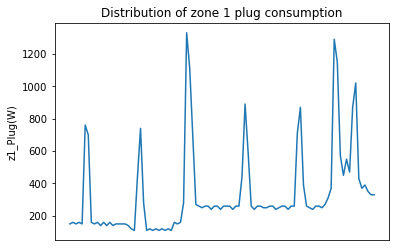

In [75]:
plt.plot('Date','z1_Plug(W)' , data = finaldf )
plt.title('Distribution of zone 1 plug consumption')
plt.ylabel('z1_Plug(W)')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

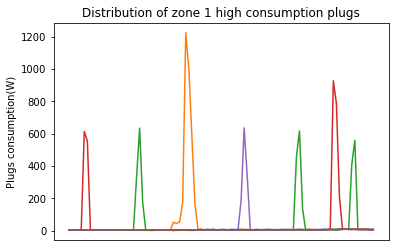

In [76]:
plt.plot('Date', 'p100', data=finaldf)
plt.plot('Date', 'p99', data=finaldf)
plt.plot('Date', 'p98', data=finaldf)
plt.plot('Date', 'p97', data=finaldf)
plt.plot('Date', 'p96', data=finaldf)
plt.plot('Date', 'p95', data=finaldf)
plt.title('Distribution of zone 1 high consumption plugs')
plt.ylabel('Plugs consumption(W)')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [81]:
plotdf = finaldf.loc[finaldf['Date'] == '2019-01-02 10:05:00']

In [82]:
plotdf

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2045,2019-01-02 10:05:00,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,7.0,7.0,8.0


In [91]:
plotdf = plotdf.drop(['Date', 'z1_Plug(W)'], axis = 1)



In [92]:
df_t = plotdf.T

In [93]:
df_t

,2045
p1,0.0
p2,0.0
p3,0.0
p4,0.0
p5,0.0
...,...
p96,5.0
p97,6.0
p98,7.0
p99,7.0


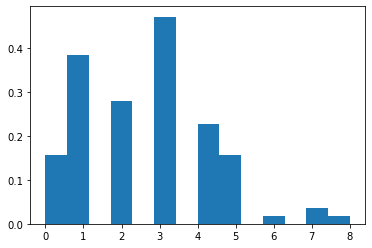

In [94]:
count, bins, ignored = plt.hist(df_t, 14, density=True)
plt.show()

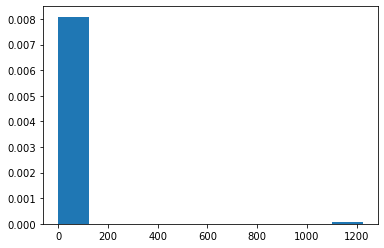

In [109]:
plotdf2 = finaldf.loc[finaldf['Date'] == '2019-01-02 09:58:00']
plotdf2 = plotdf2.drop(['Date', 'z1_Plug(W)'], axis = 1)
df_t2 = plotdf2.T
count, bins, ignored = plt.hist(df_t2, 10, density=True)
plt.show()

In [103]:
df_t2

,2038
p1,0.0
p2,0.0
p3,0.0
p4,0.0
p5,0.0
...,...
p96,3.0
p97,4.0
p98,4.0
p99,1224.0
